<a href="https://colab.research.google.com/github/AlexandreLarget/tensorflow_certification_training/blob/main/03_introduction_to_computer_vision_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolutionnal neurone network and computer vision with TensorFlow

Computer vision is the practice of writing algorithmes which can discover patterns in visual data. Such as the camera of a self-driving carrecognizing the car in front.


## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-29 07:25:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   334MB/s    in 0.3s    

2022-06-29 07:25:45 (334 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

Crucial step.
For a computer vision project, it usually means visualizing many samples.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from subdirectories

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """
  randomly show images from selected directories.
  """

  # Setup the target directory
  target_folder = target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 512, 3)


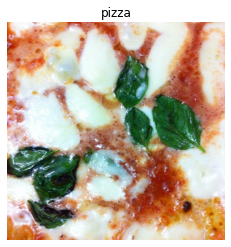

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train", target_class = "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[206, 103,  68],
        [211, 109,  69],
        [218, 122,  72],
        ...,
        [236, 222, 221],
        [237, 221, 221],
        [236, 220, 220]],

       [[200,  94,  55],
        [206, 103,  60],
        [216, 119,  68],
        ...,
        [238, 224, 223],
        [237, 223, 222],
        [236, 222, 221]],

       [[207,  98,  55],
        [216, 109,  63],
        [225, 124,  72],
        ...,
        [240, 226, 225],
        [239, 225, 224],
        [238, 224, 223]],

       ...,

       [[205,  67,   5],
        [204,  68,   6],
        [204,  72,   8],
        ...,
        [225, 126,  67],
        [225, 131,  77],
        [222, 132,  79]],

       [[202,  64,   2],
        [202,  66,   4],
        [204,  72,   8],
        ...,
        [226, 131,  73],
        [222, 132,  79],
        [214, 128,  77]],

       [[196,  58,   0],
        [196,  60,   0],
        [196,  67,   2],
        ...,
        [235, 142,  8

## An end-to-end example

Let's build a CNN to find patterns in our images. We need to :
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and trun it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model (same as the Tiny VGG)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), #len(train_data) = 47, 1500 (nber of images) / 32 (batch_size)
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 248ms/step - loss: 0.5973 - accuracy: 0.6927 - val_loss: 0.4407 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4416 - accuracy: 0.8020 - val_loss: 0.3352 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4225 - accuracy: 0.8147 - val_loss: 0.4021 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3890 - accuracy: 0.8333 - val_loss: 0.3427 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3464 - accuracy: 0.8580 - val_loss: 0.3208 - val_accuracy: 0.8780


In [ ]:
# Get our model summary()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've build before for our fashion classification problem to see how it performs here.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_2 = model_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 1.6102 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Our model 2 has 602,141 parameter where our model 1 has 31,101 (20 time less !!!).
But the model 1 outperform the model 2 that only guesses.

In [ ]:
# Let's try to improve our model 2

# Set the random seed
tf.random.set_seed(42)

# Create
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 3.8447 - accuracy: 0.6067 - val_loss: 2.1538 - val_accuracy: 0.6180
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 1.4170 - accuracy: 0.6727 - val_loss: 0.8422 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.8352 - accuracy: 0.6860 - val_loss: 0.5268 - val_accuracy: 0.7260
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.8020 - accuracy: 0.6980 - val_loss: 0.5248 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6062 - accuracy: 0.7633 - val_loss: 0.5509 - val_accuracy: 0.7400


In [ ]:
# Get the summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15000000 / 31000

483.8709677419355

**🔑Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lot of cases, it is. 

But in our case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn most important patterns in an image.** 

So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary classification: Let's break it down

1. Become one with the data
2. Preprocess the data and turn them into batches.
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with the data


Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


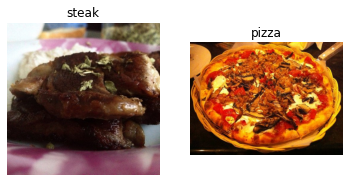

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess the data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

The next step is to turn our data into **batches**.

A Batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your precessor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32 ?
It is the number recommended by Yann LeCun

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the next batch of images, labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352

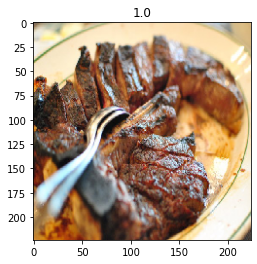

In [ ]:
plt.imshow(images[0])
plt.title(labels[0]);

### 3. Create a model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting,you try to beat the baseline.

> 🔑**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best  ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baselin, a layer CNN)
model_4 = Sequential([
  Conv2D(filters=10, # is the number of sliding windows going across an input (~= nb of neurone in the layer)
         kernel_size=3, #the size of the windows
         strides=1, # the size of the step of the sliding windows
         padding="valid", # if "same", output = input, if valid, output < input (compression)
         activation="relu",
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and samples data
                      epochs=5, 
                      steps_per_epoch=len(train_data), # goes on the 47 bacthes, could be less 
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.8288 - accuracy: 0.6887 - val_loss: 0.4143 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4300 - accuracy: 0.8140 - val_loss: 0.3714 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3080 - accuracy: 0.8860 - val_loss: 0.3984 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1740 - accuracy: 0.9447 - val_loss: 0.4091 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.0572 - accuracy: 0.9847 - val_loss: 0.5406 - val_accuracy: 0.8060


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.3208 - accuracy: 0.8780


[0.32080644369125366, 0.878000020980835]

### 5. Evaluating our model



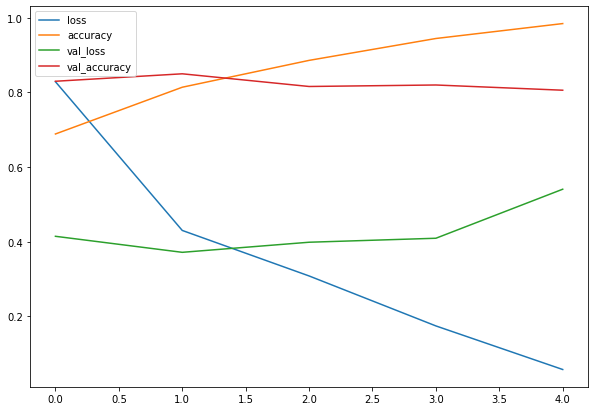

In [ ]:
 # Let's plot the training curves
 import pandas as pd
 pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for trainin and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss)) # How many epochs ?

  #Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend(); 

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.
This means, it's learning the aptterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

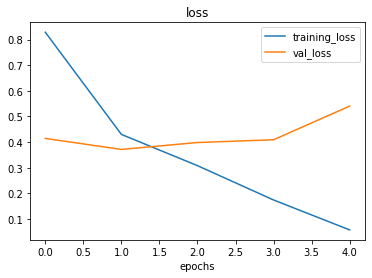

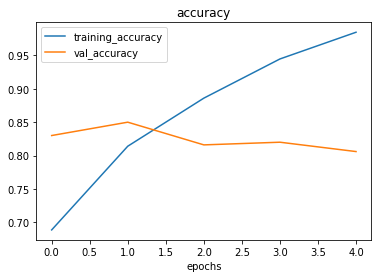

In [ ]:
# Check out loss and accuracy
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile
model_5.compile(loss="binary_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6331 - accuracy: 0.6280 - val_loss: 0.4716 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4627 - accuracy: 0.7833 - val_loss: 0.4125 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4203 - accuracy: 0.8207 - val_loss: 0.3388 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4010 - accuracy: 0.8273 - val_loss: 0.3334 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3835 - accuracy: 0.8340 - val_loss: 0.3329 - val_accuracy: 0.8660


In [ ]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

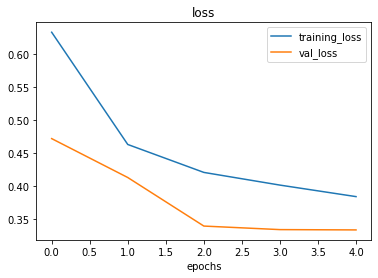

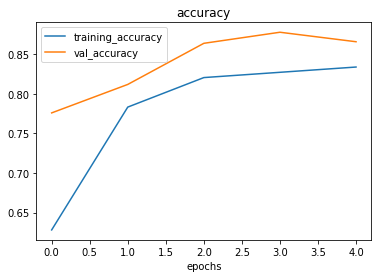

In [ ]:
# Plot lost curves
plot_loss_curves(history_5)

### Opening our bag of trick and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmenetation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without fdata augmentation for our testing data
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [ ]:
# Import adta and augment it from train directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224), 
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration only

# Create non_augmented train data
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Dta augmentation is usually only performed on the training data.

Using `ImageDataGenerator` doesn't change the images in the directories. It only changes the loaded images in the model.

In [ ]:
# Get some sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented

Showing image number: 30.


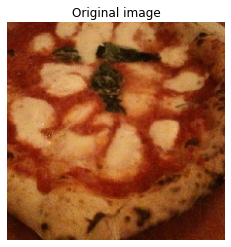

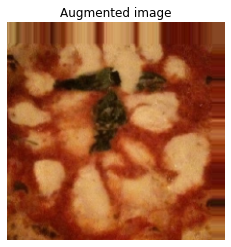

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31)

print("Showing image number: {}.".format(random_number))
plt.figure()
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False);
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Now we will build a model for our augmented data.

In [ ]:
# Create a model (same as model 5)
model_6 = Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 463ms/step - loss: 0.7192 - accuracy: 0.4947 - val_loss: 0.6773 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.7017 - accuracy: 0.5520 - val_loss: 0.6585 - val_accuracy: 0.5320
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6712 - accuracy: 0.5427 - val_loss: 0.6105 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6466 - accuracy: 0.6600 - val_loss: 0.5823 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6356 - accuracy: 0.6867 - val_loss: 0.5632 - val_accuracy: 0.6900


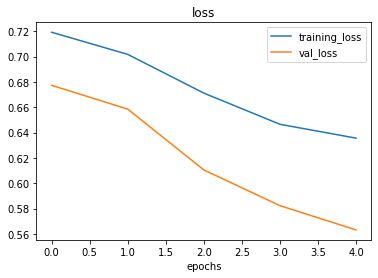

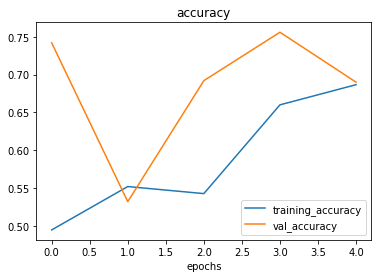

In [ ]:
# Check our model training curves
plot_loss_curves(history_6)

In [ ]:
# Shuffle our augmented data
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224, 224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create model 7
model_7 = Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile
model_7.compile(loss="binary_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6598 - accuracy: 0.5773 - val_loss: 0.5838 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5849 - accuracy: 0.6867 - val_loss: 0.4765 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5206 - accuracy: 0.7407 - val_loss: 0.3662 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4944 - accuracy: 0.7713 - val_loss: 0.3393 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4618 - accuracy: 0.7913 - val_loss: 0.3321 - val_accuracy: 0.8720


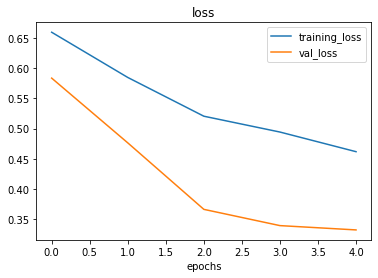

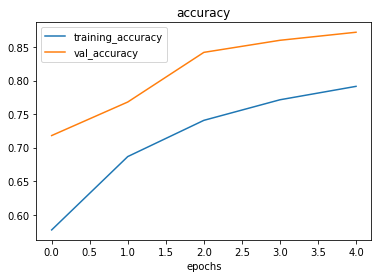

In [ ]:
# Get our curves plot
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten oour baseline, they're a few things we could try to continue to improve our model:
* increase the number of model layers
* increase the number of filters per layer
* train for longer
* find ideal learning rate
* get more data
* use **transfer learning**

🛠 **Practice:** Recrate the model on the CNN explainer website and see with the augmented shuffled data how it goes

In [ ]:
# Create the model
model_8 = Sequential([
  Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(2),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit
history_8 = model_8.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 505ms/step - loss: 0.6564 - accuracy: 0.6220 - val_loss: 0.5143 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5396 - accuracy: 0.7307 - val_loss: 0.3798 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 23s 497ms/step - loss: 0.5298 - accuracy: 0.7380 - val_loss: 0.4092 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4907 - accuracy: 0.7700 - val_loss: 0.4012 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4784 - accuracy: 0.7860 - val_loss: 0.3647 - val_accuracy: 0.8560


In [ ]:
0.7760, 0.8460

(0.776, 0.846)

## Making a prediction with our trained model on our custom data

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2022-06-29 07:35:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-06-29 07:35:38 (54.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



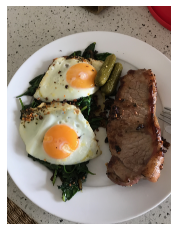

In [ ]:
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

🔑 **Note:** We need to prepreccessed the data imported for our model.

In [ ]:
# Create a function to import and resize our images
def load_and_pred_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # normalize the image
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_pred_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
pred = model_8.predict(expanded_steak)
pred

array([[0.66610026]], dtype=float32)

looks like our custome image is been put through our model.
But it would be nice if we can visualize the image as well as the model prediction.

In [ ]:
# Remind ourselves of our class name
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the prediction class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names, img_shape=224):
  """
  Imports an image located at filename, makes a predictions with model
  and plots the image with the predicted class as the title
  """
  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Normalize the image
  img = img/255.
  # Expand the image
  expanded_img = tf.expand_dims(img, axis=0)
  
  # Make the prediction
  pred = model.predict(expanded_img)
  pred_class = class_names[int(tf.round(pred))]

  # Plot the result
  plt.figure()
  plt.imshow(img)
  plt.axis(False)
  plt.title("Prediction: {}".format(pred_class))


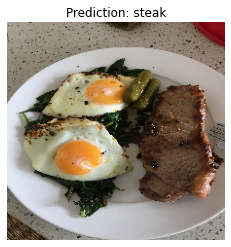

In [ ]:
pred_and_plot(model=model_8, filename="03-steak.jpeg")

--2022-06-29 07:35:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-06-29 07:35:41 (65.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



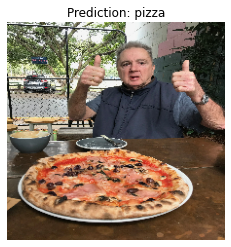

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg")

# Multi-class Image Classification

 1. Become one with the data
 2. Preprocess the data (get it ready for a model)
 3. Create a model (start with a baseline)
 4. Fit the model (overfit it to make sure it works)
 5. Evaluate the model
 6. Adjust different hyperparameters and improve the model
 7. repeat until satisfied

### 1. Become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-29 07:35:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   187MB/s    in 2.7s    

2022-06-29 07:35:45 (187 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
# Walk through the data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


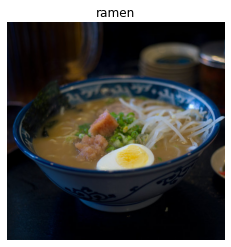

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### 2. Preprocess the data

In [ ]:
from matplotlib import test
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load the data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='sparse')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='sparse')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [ ]:
# Create the model
model_8 = Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile
model_8.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

### 4. Fit the model

In [ ]:
# Fit
history_8 = model_8.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 189ms/step - loss: 2.2339 - accuracy: 0.1611 - val_loss: 2.1550 - val_accuracy: 0.2036
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.9383 - accuracy: 0.3219 - val_loss: 2.0124 - val_accuracy: 0.2612
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.5908 - accuracy: 0.4549 - val_loss: 2.0448 - val_accuracy: 0.3008
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 0.9918 - accuracy: 0.6713 - val_loss: 2.6132 - val_accuracy: 0.2676
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.4055 - accuracy: 0.8755 - val_loss: 3.7066 - val_accuracy: 0.2544


### 5. Evaluate the model

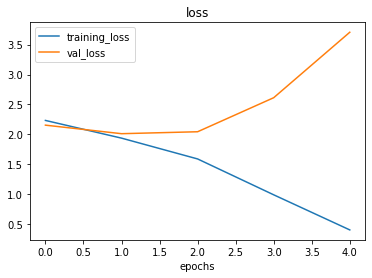

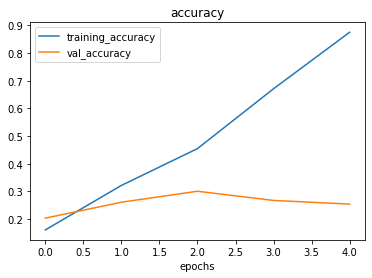

In [ ]:
# Plot the curves
plot_loss_curves(history_8)

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 3.7066 - accuracy: 0.2544


[3.706552743911743, 0.25440001487731934]

### 6. Adjust the model hyperparameters (to beat the baseline and reduce overfitting)

In [ ]:
# How about we try and simplify or model first

# Create the model
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile
model_9.compile(loss="sparse_categorical_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.1602 - accuracy: 0.2433 - val_loss: 1.9526 - val_accuracy: 0.3132
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 1.8013 - accuracy: 0.3863 - val_loss: 1.9146 - val_accuracy: 0.3232
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.4437 - accuracy: 0.5280 - val_loss: 1.9501 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 0.9342 - accuracy: 0.7075 - val_loss: 2.2330 - val_accuracy: 0.3116
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.5128 - accuracy: 0.8488 - val_loss: 2.7375 - val_accuracy: 0.3024


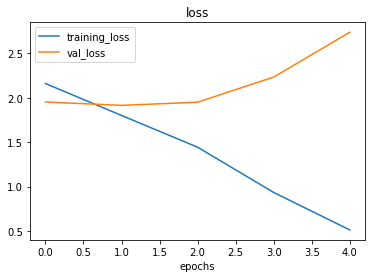

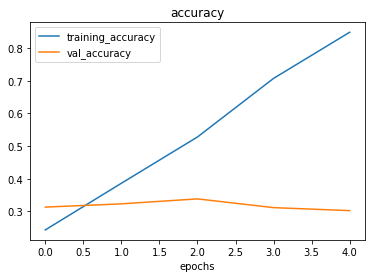

In [ ]:
# Plot our loss curves
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

Alors que l'on a réduit le modèle en enlevant 2 layers, celui-ci a plus de paramètres !

In [ ]:
# Model idée perso
model_9_2 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile
model_9_2.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])

# Fit
history_9_2 = model_9_2.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 182ms/step - loss: 2.0888 - accuracy: 0.2445 - val_loss: 1.9176 - val_accuracy: 0.3236
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 1.8764 - accuracy: 0.3468 - val_loss: 1.8818 - val_accuracy: 0.3544
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.7368 - accuracy: 0.4115 - val_loss: 1.8422 - val_accuracy: 0.3744
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 1.5992 - accuracy: 0.4532 - val_loss: 1.8601 - val_accuracy: 0.3704
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 1.4269 - accuracy: 0.5213 - val_loss: 1.9554 - val_accuracy: 0.3564


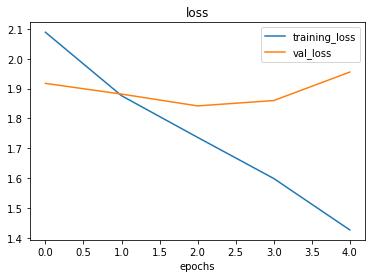

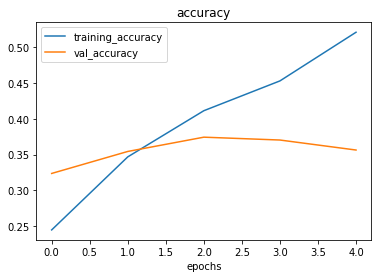

In [ ]:
# Get the loss curves
plot_loss_curves(history_9_2)

### Trying to reduce overfitting with data augmentation


In [ ]:
# Rescaling and data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.15,
                                             width_shift_range=0.15,
                                             brightness_range=(0.1, 0.9),
                                             shear_range=0.15,
                                             zoom_range=0.15,
                                             horizontal_flip=0.15,
                                             vertical_flip=0.15)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load the augmented data
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode="sparse")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="sparse")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Create the model
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss="sparse_categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented, 
                          epochs=5, 
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 519ms/step - loss: 2.2825 - accuracy: 0.1233 - val_loss: 2.1763 - val_accuracy: 0.1864
Epoch 2/5
235/235 [==============================] - 121s 517ms/step - loss: 2.1407 - accuracy: 0.2219 - val_loss: 2.0300 - val_accuracy: 0.2616
Epoch 3/5
235/235 [==============================] - 121s 516ms/step - loss: 2.0753 - accuracy: 0.2525 - val_loss: 2.0207 - val_accuracy: 0.2868
Epoch 4/5
235/235 [==============================] - 122s 519ms/step - loss: 2.0660 - accuracy: 0.2613 - val_loss: 2.0128 - val_accuracy: 0.2924
Epoch 5/5
235/235 [==============================] - 122s 518ms/step - loss: 2.0355 - accuracy: 0.2751 - val_loss: 1.9494 - val_accuracy: 0.3144


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 3.7066 - accuracy: 0.2544


[3.706552267074585, 0.25440001487731934]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.9494 - accuracy: 0.3144


[1.949360966682434, 0.31439998745918274]

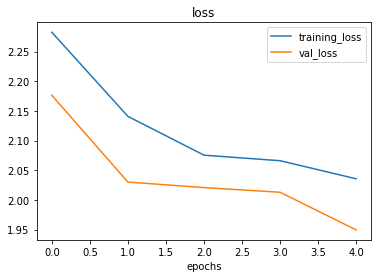

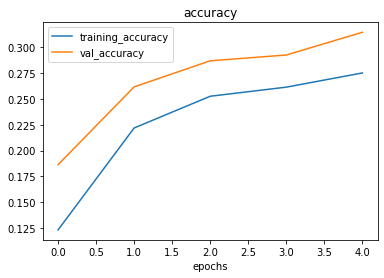

In [ ]:
# Check out our curves
plot_loss_curves(history_10)

In [ ]:
model_11 = tf.keras.models.clone_model(model_9_2)

# Compile the model
model_11.compile(loss="sparse_categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit
history_11 = model_11.fit(train_data_augmented, 
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 119s 507ms/step - loss: 2.1871 - accuracy: 0.1960 - val_loss: 2.1251 - val_accuracy: 0.2428
Epoch 2/5
235/235 [==============================] - 117s 500ms/step - loss: 2.0776 - accuracy: 0.2569 - val_loss: 2.0051 - val_accuracy: 0.2832
Epoch 3/5
235/235 [==============================] - 119s 506ms/step - loss: 2.0356 - accuracy: 0.2688 - val_loss: 1.9452 - val_accuracy: 0.3192
Epoch 4/5
235/235 [==============================] - 143s 608ms/step - loss: 2.0039 - accuracy: 0.2843 - val_loss: 2.0032 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 164s 696ms/step - loss: 1.9672 - accuracy: 0.3087 - val_loss: 1.9735 - val_accuracy: 0.3204


In [ ]:
# Test perso again
model_12 = Sequential([
  Conv2D(50, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(50, 3, activation="relu"),
  MaxPool2D(2, padding="same"),
  Conv2D(50, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  MaxPool2D(2, padding="same"),
  Conv2D(50, 3, activation="relu"),
  Conv2D(50, 3, activation="relu"),
  MaxPool2D(2, padding="same"),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile
model_12.compile(loss='sparse_categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit
history_12 = model_12.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 172s 570ms/step - loss: 2.2578 - accuracy: 0.1337 - val_loss: 2.1698 - val_accuracy: 0.1996
Epoch 2/10
235/235 [==============================] - 133s 564ms/step - loss: 2.1626 - accuracy: 0.1949 - val_loss: 2.1734 - val_accuracy: 0.1924
Epoch 3/10
235/235 [==============================] - 134s 569ms/step - loss: 2.1172 - accuracy: 0.2245 - val_loss: 2.0657 - val_accuracy: 0.2596
Epoch 4/10
235/235 [==============================] - 140s 598ms/step - loss: 2.0786 - accuracy: 0.2508 - val_loss: 2.0133 - val_accuracy: 0.2804
Epoch 5/10
235/235 [==============================] - 135s 573ms/step - loss: 2.0364 - accuracy: 0.2788 - val_loss: 1.9355 - val_accuracy: 0.3128
Epoch 6/10
235/235 [==============================] - 138s 588ms/step - loss: 1.9734 - accuracy: 0.3075 - val_loss: 1.8902 - val_accuracy: 0.3352
Epoch 7/10
235/235 [==============================] - 131s 559ms/step - loss: 1.9286 - accuracy: 0.3213 - val_loss: 1.8689 -

### Making predictions with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2022-06-29 08:36:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.03s   

2022-06-29 08:36:21 (48.9 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2022-06-29 08:36:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [ ]:
def pred_and_plot(model, filename, class_names=class_names, img_shape=224):
  """
  Imports an image located at filename, makes a predictions with model
  and plots the image with the predicted class as the title
  """
  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Normalize the image
  img = img/255.
  # Expand the image
  expanded_img = tf.expand_dims(img, axis=0)
  
  # Make the prediction
  pred = model.predict(expanded_img)

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  # Plot the result
  plt.figure()
  plt.imshow(img)
  plt.axis(False)
  plt.title("Prediction: {}".format(pred_class))


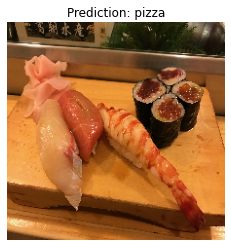

In [ ]:
# Make some prediction
pred_and_plot(model=model_12,
              filename="03-sushi.jpeg",
              class_names=class_names)

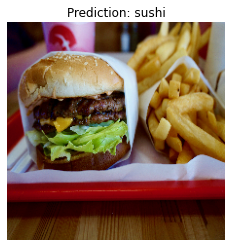

In [ ]:
pred_and_plot(model=model_12,
              filename="03-hamburger.jpeg",
              class_names=class_names)

## Saving and loading our model

In [ ]:
# Save a model
model_12.save("save_trained_model_12")

INFO:tensorflow:Assets written to: save_trained_model_12/assets


In [ ]:
# Loading a trained model and evaluate it
loaded_model = tf.keras.models.load_model("save_trained_model_12")

In [ ]:
model_12.evaluate(test_data)

79/79 [==============================] - 17s 214ms/step - loss: 1.8255 - accuracy: 0.3800


[1.8255281448364258, 0.3799999952316284]

In [ ]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 1.8255 - accuracy: 0.3800


[1.8255281448364258, 0.3799999952316284]